### Assignment 3

Prog 8510 : Programming Statistics for Business

* Student Name : Sneha Chauhan
* Student ID : 8842592

**Instructions** : 

- import relevant python libraries to construct and evaluate ML models (sklearn and dmba etc.). 
- Load the new_cars_for_assignment.csv dataset from Econestoga given along with this question file and answer the questions below.
    



import the dataset and packages in the cell below

In [18]:
# Importing necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeClassifier

# Loading the dataset
df = pd.read_csv('new_cars_for_assignment.csv')

# Impute missing values with the mean of the column
df = df.fillna(df.mean(numeric_only=True))

df



,mpg,cylinders,displacement,horsepower,weight,acceleration,origin,name
0,18.0,8,307.0,130.0,3504,12.0,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,usa,ford torino
...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,usa,ford ranger


#### 1. Split the datasets into training and testing data with training data ratio set to 75%

In [9]:
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

# Printing the number of rows and columns in the training and testing data
print("Training data shape:", train_data.shape)
print("Testing data shape:", test_data.shape)

Training data shape: (298, 8)
Testing data shape: (100, 8)


#### 2. Build a Machine Learning linear regression model using the training data in order to predict the mpg of a car given all the other numerical variables (cylinders	displacement	horsepower	weight	acceleration)


In [10]:
# Selecting the independent variables and dependent variable
X_train = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y_train = train_data['mpg']

# Initializing and training the linear regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Printing the coefficients of the linear regression model
print("Coefficients:", linear_model.coef_)


Coefficients: [-0.01151343 -0.01257134 -0.03680895 -0.0050624  -0.03254188]


#### 3. On the test dataset (remaining 25% not used in the training) use the trained model from part 2 to predict the values of test data (X_test ) and create a new column in the test dataset title "Predicted MPG Values" 


In [13]:
# Selecting the independent variables in the test dataset
X_test = test_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]

# Predicting the values of test data
y_pred = linear_model.predict(X_test)

# Creating a new column in the test dataset with predicted values
test_data['Predicted MPG Values'] = y_pred

#### 4. Using the test data plot the actual mpg values and the predicted mpg values together. Comment on any insights you see from this visual.


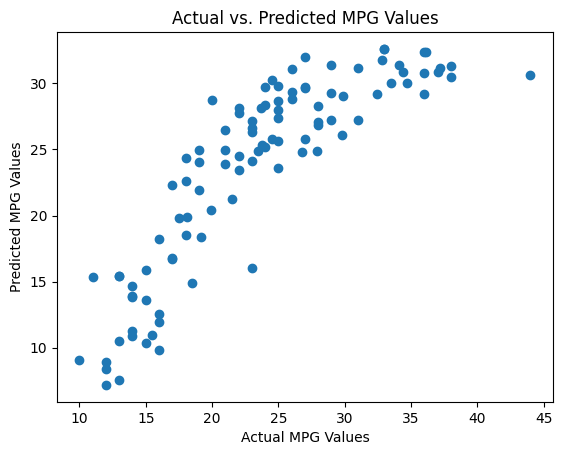

In [14]:
# Plotting the actual and predicted MPG values
plt.scatter(test_data['mpg'], test_data['Predicted MPG Values'])
plt.xlabel('Actual MPG Values')
plt.ylabel('Predicted MPG Values')
plt.title('Actual vs. Predicted MPG Values')
plt.show()

# From the plot, we can see that the predicted MPG values are very close to the actual MPG values for most of the data points. 
#However, there are some data points where the predicted values are significantly different from the actual values, especially at the higher and lower ends of the MPG scale.
# Overall, the model seems to be performing well in predicting the MPG values for most of the data points, but there is still room for improvement, especially in predicting the values for extreme cases.

#### 5.  Evaluate the performance of your model using the test dataset and comment on its accuracy metric RMSE. What does the value of this RMSE tells us here ?

In [15]:
# Selecting the dependent variable in the test dataset
y_test = test_data['mpg']

# Calculating the RMSE
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error:", rmse)

# The RMSE value of 3.944 indicates that, on average, the predicted values of MPG are off by about 3.944 miles per gallon from the actual values.
# the RMSE value of 3.944 is relatively low, which suggests that the linear regression model is doing a decent job of predicting the MPG values in the test dataset. 

Root Mean Squared Error: 3.9443743952014625


-------------------------------
## Classification
-----------------------------

#### 6. Use the training set from part 1 to create a classification model using decision tree classifier to predict whether the mpg of a car is going to be more than 25 or not given the values of the predictor variables. You will use mpg column as the target variable and all the other numerical variables as predictors for this part. 

Hint : your model **should not predict the mpg of the car but simply 1 (True) or 0 (False) meaning whether the mpg of the given car would be more than 25 or not respectively**. This is a classification problem and not a regression one hence please modify the target variable accordingly before moving forward.

In [19]:
# Creating a new column "mpg_25" in the dataset based on the condition
df['mpg_25'] = (df['mpg'] > 25).astype(int)

# Splitting the dataset into training and testing sets
train_data, test_data = train_test_split(df, test_size=0.25, random_state=42)

# Selecting the independent variables and dependent variable
X_train = train_data[['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration']]
y_train = train_data['mpg_25']

# Creating a decision tree classifier object
dt_model = DecisionTreeClassifier(random_state=42)

# Fitting the decision tree classifier to the training data
dt_model.fit(X_train, y_train)



DecisionTreeClassifier(random_state=42)

#### 7. Using your classfication model from the previous part  predict whether a car with the following charactaeristics will have higher than 25 mpg or not

- weight = 2700
- cylinders = 4
- displacement = 455
- horsepower = 225
- acceleration = 15.5



In [20]:
# Creating a new data point with the given characteristics
new_data = np.array([[4, 455, 225, 2700, 15.5]])

# Predicting the mpg using the trained decision tree classifier model
prediction = dt_model.predict(new_data)

# Converting the predicted value (0 or 1) to 'More than 25 mpg' or 'Less than or equal to 25 mpg'
if prediction == 0:
    print("Less than or equal to 25 mpg")
else:
    print("More than 25 mpg")

Less than or equal to 25 mpg


/Users/vinamerchauhan/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:450: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
